# Data Collection

1. Yahoo Finance API 
2. Alpha Vantage: https://www.alphavantage.co

## Yahoo Finance


In [50]:
import yfinance as yf
import pandas as pd

def fetch_stock_data_yf(symbol, start_date=None, end_date=None):
    '''Fetch daily stock data, by default return all data from earilst available date and to latest date'''
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    if stock_data.empty:
        raise ValueError(f"No data found for symbol: {symbol}")
    return stock_data

stock_data = fetch_stock_data_yf('AAPL')
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1980-12-12  0.098726  0.099155  0.098726  0.098726  469033600
1980-12-15  0.093575  0.094005  0.093575  0.094005  175884800
1980-12-16  0.086707  0.087136  0.086707  0.087136  105728000
1980-12-17  0.088853  0.089282  0.088853  0.088853   86441600
1980-12-18  0.091429  0.091858  0.091429  0.091429   73449600


In [53]:
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)
print(stock_data.head())

if stock_data.index.name == 'Date':
    stock_data = stock_data.reset_index()
    # Now 'Date' is a regular column, and the DataFrame has a default integer index.

# Optional: Rename columns (e.g., to lowercase)
stock_data.columns = [col.lower() for col in stock_data.columns]

print(stock_data.head())


Price          Close      High       Low      Open     Volume
Date                                                         
1980-12-12  0.098726  0.099155  0.098726  0.098726  469033600
1980-12-15  0.093575  0.094005  0.093575  0.094005  175884800
1980-12-16  0.086707  0.087136  0.086707  0.087136  105728000
1980-12-17  0.088853  0.089282  0.088853  0.088853   86441600
1980-12-18  0.091429  0.091858  0.091429  0.091429   73449600
        date     close      high       low      open     volume
0 1980-12-12  0.098726  0.099155  0.098726  0.098726  469033600
1 1980-12-15  0.093575  0.094005  0.093575  0.094005  175884800
2 1980-12-16  0.086707  0.087136  0.086707  0.087136  105728000
3 1980-12-17  0.088853  0.089282  0.088853  0.088853   86441600
4 1980-12-18  0.091429  0.091858  0.091429  0.091429   73449600


## Alpha Vantage

In [44]:
import requests
import pandas as pd
import os

API_KEY = os.getenv("AlPHAVANTAGE_API_KEY")
BASE_URL = 'https://www.alphavantage.co/query?'

def fetch_stock_data(symbol, interval='TIME_SERIES_DAILY'): # 20 years max
    parameters = {
        'function': interval,
        'symbol': symbol,
        'apikey': API_KEY
    }
    response = requests.get(BASE_URL, params=parameters)
    data = response.json()
    
    if 'Time Series (Daily)' not in data:
        raise ValueError('Invalid API response. Check the stock symbol and try again.')
    
    ts_data = data['Time Series (Daily)']
    return pd.DataFrame.from_dict(ts_data, orient='index')

# Example usage:
df_aapl = fetch_stock_data('AAPL')
print(df_aapl.head())

             1. open   2. high    3. low  4. close  5. volume
2025-04-17  197.2000  198.8335  194.4200  196.9800   52164675
2025-04-16  198.3600  200.7000  192.3700  194.2700   59732423
2025-04-15  201.8550  203.5100  199.8000  202.1400   51343872
2025-04-14  211.4400  212.9400  201.1621  202.5200  101352911
2025-04-11  186.1000  199.5400  186.0600  198.1500   87435915


In [45]:
print(df_aapl.describe())
print(df_aapl.info())

         1. open   2. high    3. low  4. close 5. volume
count        100       100       100       100       100
unique        99        98       100       100       100
top     246.8900  240.7900  194.4200  196.9800  52164675
freq           2         2         1         1         1
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-04-17 to 2024-11-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB
None


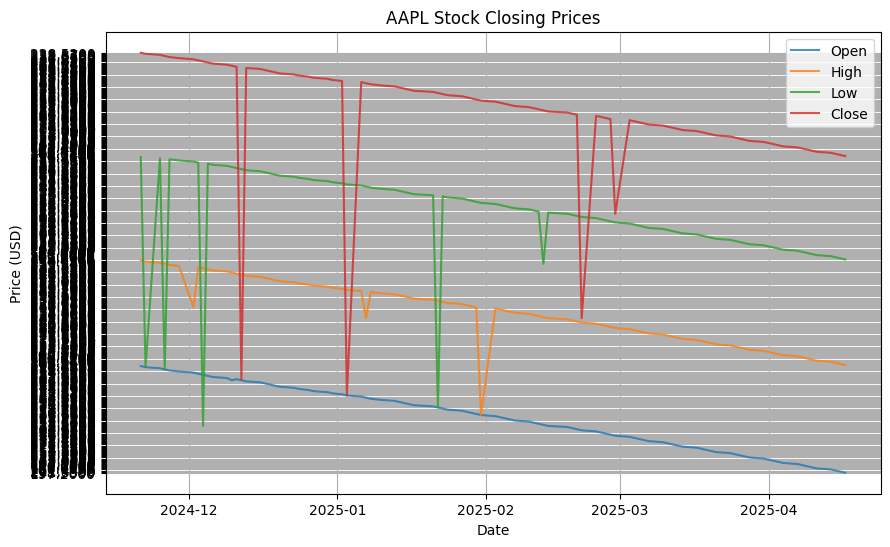

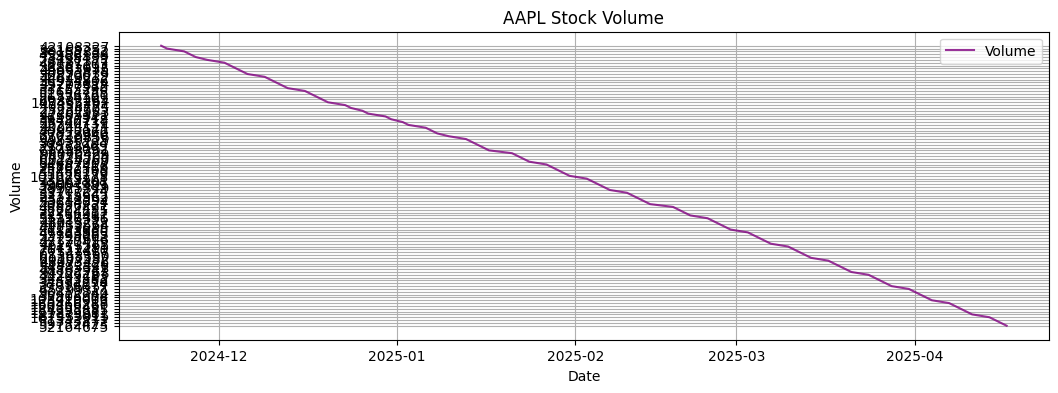

In [46]:
import matplotlib.pyplot as plt

df_aapl.index = pd.to_datetime(df_aapl.index)

df_aapl.columns = df_aapl.columns.str.lower()

plt.figure(figsize=(10, 6))
plt.plot(df_aapl.index, df_aapl['1. open'], label='Open', alpha=0.8)
plt.plot(df_aapl.index, df_aapl['2. high'], label='High', alpha=0.8)
plt.plot(df_aapl.index, df_aapl['3. low'], label='Low', alpha=0.8)
plt.plot(df_aapl.index, df_aapl['4. close'], label='Close', alpha=0.8)
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Plot volume separately (optional, as it may have a different scale)
plt.figure(figsize=(12, 4))
plt.plot(df_aapl.index, df_aapl['5. volume'], label='Volume', color='purple', alpha=0.8)
plt.title('AAPL Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()

# Show the plot
plt.show()

## symbols (index)

In [47]:
URL = f"https://www.alphavantage.co/query?function=LISTING_STATUS&apikey={API_KEY}"

# Fetch data and load into a DataFrame
symbols_df = pd.read_csv(URL)
print("unique")
unique_counts = symbols_df.nunique()
print(unique_counts)
print("head")
print(symbols_df.head())


# check all the details
symbols_stock = symbols_df[symbols_df['assetType']=="Stock"]
symbols_ETF = symbols_df[symbols_df['assetType']=="ETF"]
print(symbols_stock)


unique
symbol           11821
name             11116
exchange             5
assetType            2
ipoDate           4385
delistingDate        0
status               1
dtype: int64
head
  symbol                                             name   exchange  \
0      A                         Agilent Technologies Inc       NYSE   
1     AA                                       Alcoa Corp       NYSE   
2    AAA  ALTERNATIVE ACCESS FIRST PRIORITY CLO BOND ETF   NYSE ARCA   
3   AAAU                  Goldman Sachs Physical Gold ETF       BATS   
4  AACBR                 Artius II Acquisition Inc Rights     NASDAQ   

  assetType     ipoDate  delistingDate  status  
0     Stock  1999-11-18            NaN  Active  
1     Stock  2016-10-18            NaN  Active  
2       ETF  2020-09-09            NaN  Active  
3       ETF  2018-08-15            NaN  Active  
4     Stock  2025-04-07            NaN  Active  
      symbol                                               name   exchange  \
0        

In [48]:
# save the data to local storage
output_dir = os.path.join('..', 'data', 'raw')
stock_output_file = os.path.join(output_dir, 'stock_symbols.csv')
os.makedirs(output_dir, exist_ok=True)
symbols_stock.to_csv(stock_output_file, index=False)
print(f"Data saved to '{stock_output_file}'.")

Data saved to '../data/raw/stock_symbols.csv'.


## Other indices

In [49]:
index_map_yf = {
    # three most important stock indices
    'S&P500': '^GSPC', 
    'DJI': '^DJI',
    'Nasdaq': '^IXIC',
    # oil and gold
    'gold_futures': 'GC=F',  # gold futures
    'crude_oil_futures': 'CL=F',  # Crude Oil Futures
    # USD related
    '13_Week_Treasury_Bill': '^IRX',  # 13 Week Treasury Bill
    '26_Week_Treasury_Bill': '^FVX',  # 26 Week Treasury Bill (5-Year Yield)
    '52_Week_Treasury_Bill': '^TNX',  # 52 Week Treasury Bill (10-Year Yield)
    '30_Year_Treasury_Bond': '^TYX',  # 30-Year Treasury Bond
    'US_Dollar_Index': 'DX-Y.NYB'  # US Dollar Index
}

for index_name, ticker in index_map_yf.items():
    try:
        data = yf.download(ticker, period="max")  # Fetch all available data
        print(data.head())
        print(data.tail())
        print(f"Data for {index_name} fetched successfully.")
    except Exception as e:
        print(f"Failed to fetch data for {index_name}: {e}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open Volume
Ticker          ^GSPC      ^GSPC      ^GSPC      ^GSPC  ^GSPC
Date                                                         
1927-12-30  17.660000  17.660000  17.660000  17.660000      0
1928-01-03  17.760000  17.760000  17.760000  17.760000      0
1928-01-04  17.719999  17.719999  17.719999  17.719999      0
1928-01-05  17.549999  17.549999  17.549999  17.549999      0
1928-01-06  17.660000  17.660000  17.660000  17.660000      0
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-04-11  5363.359863  5381.459961  5220.770020  5255.560059  5602550000
2025-04-14  5405.970215  5459.459961  5358.020020  5441.959961  5031440000
2025-04-15  5396.629883  5450.410156  5386.439941  5411.990234  4317110000
2025-04-16  5275.700195  5367.240234  5220.790039  533

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open Volume
Ticker           ^IXIC       ^IXIC       ^IXIC       ^IXIC  ^IXIC
Date                                                             
1971-02-05  100.000000  100.000000  100.000000  100.000000      0
1971-02-08  100.839996  100.839996  100.839996  100.839996      0
1971-02-09  100.760002  100.760002  100.760002  100.760002      0
1971-02-10  100.690002  100.690002  100.690002  100.690002      0
1971-02-11  101.449997  101.449997  101.449997  101.449997      0
Price              Close          High           Low          Open      Volume
Ticker             ^IXIC         ^IXIC         ^IXIC         ^IXIC       ^IXIC
Date                                                                          
2025-04-11  16724.460938  16753.410156  16228.040039  16358.530273  9444890000
2025-04-14  16831.480469  17136.560547  16661.259766  17120.439453  9667260000
2025-04-15  16823.169922  16979.960938  16753.220703  16842.390625  748305000

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open Volume
Ticker           CL=F       CL=F       CL=F       CL=F   CL=F
Date                                                         
2000-08-23  32.049999  32.799999  31.950001  31.950001  79385
2000-08-24  31.629999  32.240002  31.400000  31.900000  72978
2000-08-25  32.049999  32.099998  31.320000  31.700001  44601
2000-08-28  32.869999  32.919998  31.860001  32.040001  46770
2000-08-29  32.720001  33.029999  32.560001  32.820000  49131
Price           Close       High        Low       Open  Volume
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F
Date                                                          
2025-04-11  61.500000  61.869999  59.430000  60.200001  306231
2025-04-14  61.529999  62.680000  60.590000  61.700001  238068
2025-04-15  61.330002  62.060001  60.880001  61.580002  197404
2025-04-16  62.470001  62.980000  60.439999  61.540001  213194
2025-04-17  64.680000  64.860001  62.610001  62.630001  213194


[*********************100%***********************]  1 of 1 completed

Price      Close  High   Low  Open Volume
Ticker      ^IRX  ^IRX  ^IRX  ^IRX   ^IRX
Date                                     
1960-01-04  4.52  4.52  4.52  4.52      0
1960-01-05  4.55  4.55  4.55  4.55      0
1960-01-06  4.68  4.68  4.68  4.68      0
1960-01-07  4.63  4.63  4.63  4.63      0
1960-01-08  4.59  4.59  4.59  4.59      0
Price       Close   High    Low   Open Volume
Ticker       ^IRX   ^IRX   ^IRX   ^IRX   ^IRX
Date                                         
2025-04-11  4.213  4.213  4.180  4.180      0
2025-04-14  4.195  4.215  4.190  4.205      0
2025-04-15  4.200  4.210  4.200  4.210      0
2025-04-16  4.208  4.210  4.193  4.195      0
2025-04-17  4.205  4.208  4.190  4.197      0
Data for 13_Week_Treasury_Bill fetched successfully.


KeyboardInterrupt: 

In [55]:
from pandas_datareader import data as pdr
import datetime

start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.today()
series_ids  = {
    # macro econ
    'Real GDP': 'A191RL1Q225SBEA',  # Real Gross Domestic Product, Quarterly, SAAR; return: percentage change from preceding Quater
    'CPI': 'CPIAUCSL', # Consumer Price Index for All Urban Consumers: All Items, Monthly, SA
    'Unemployment Rate': 'UNRATE' # Civilian Unemployment Rate, Monthly, SA
}

for index_name, id in series_ids.items():
    try: 
        data = pdr.DataReader(id, 'fred', start, end)
        if data.index.name == 'DATE':
                data = data.reset_index()
        print(data.head(5))
        print(data.tail(5))
        print(f"Data for {index_name} fetched successfully.")
    except Exception as e:
        print(f"Failed to fetch data for {index_name}: {e}")


        DATE  A191RL1Q225SBEA
0 1947-04-01             -1.0
1 1947-07-01             -0.8
2 1947-10-01              6.4
3 1948-01-01              6.2
4 1948-04-01              6.8
          DATE  A191RL1Q225SBEA
306 2023-10-01              3.2
307 2024-01-01              1.6
308 2024-04-01              3.0
309 2024-07-01              3.1
310 2024-10-01              2.4
Data for Real GDP fetched successfully.
        DATE  CPIAUCSL
0 1947-01-01     21.48
1 1947-02-01     21.62
2 1947-03-01     22.00
3 1947-04-01     22.00
4 1947-05-01     21.95
          DATE  CPIAUCSL
934 2024-11-01   316.449
935 2024-12-01   317.603
936 2025-01-01   319.086
937 2025-02-01   319.775
938 2025-03-01   319.615
Data for CPI fetched successfully.
        DATE  UNRATE
0 1948-01-01     3.4
1 1948-02-01     3.8
2 1948-03-01     4.0
3 1948-04-01     3.9
4 1948-05-01     3.5
          DATE  UNRATE
922 2024-11-01     4.2
923 2024-12-01     4.1
924 2025-01-01     4.0
925 2025-02-01     4.1
926 2025-03-01     4.2
D

## All individual stocks

In [ ]:
import pandas as pd

# Fetch S&P 500 tickers from a public source
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(url)[0]  # Read the first table from the webpage
sp500_tickers = sp500_table['Symbol'].tolist()  # Extract the 'Symbol' column
print(sp500_tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'D

In [ ]:
import json

counter = 0
sp500_tickers_valid = []
for symbol in sp500_tickers:
    print(f"Processing symbol: {symbol}")
    try:
        # Fetch stock data for the current symbol
        stock_data = yf.download(symbol, period="max")
        output_csv_file = os.path.join(output_dir, f"{symbol}_raw.csv")
        stock_data.to_csv(output_csv_file)
        counter += 1 # only count when valid
        sp500_tickers_valid.append(symbol)
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {e}")

output_file = os.path.join(output_dir, 'a_ticker_index.json')
with open(output_file, 'w') as f: # override
    json.dump(sp500_tickers_valid, f)
print("total valid stock count:", counter) 

Processing symbol: MMM


[*********************100%***********************]  1 of 1 completed


Processing symbol: AOS


[*********************100%***********************]  1 of 1 completed


Processing symbol: ABT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: ABBV
Processing symbol: ACN


[*********************100%***********************]  1 of 1 completed


Processing symbol: ADBE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: AMD


Processing symbol: AES


[*********************100%***********************]  1 of 1 completed


Processing symbol: AFL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: A


Processing symbol: APD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: ABNB
Processing symbol: AKAM


[*********************100%***********************]  1 of 1 completed


Processing symbol: ALB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: ARE



[*********************100%***********************]  1 of 1 completed


Processing symbol: ALGN
Processing symbol: ALLE


[*********************100%***********************]  1 of 1 completed


Processing symbol: LNT


[*********************100%***********************]  1 of 1 completed


Processing symbol: ALL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: GOOGL
Processing symbol: GOOG


[*********************100%***********************]  1 of 1 completed


Processing symbol: MO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: AMZN



[*********************100%***********************]  1 of 1 completed


Processing symbol: AMCR
Processing symbol: AEE


[*********************100%***********************]  1 of 1 completed


Processing symbol: AEP


[*********************100%***********************]  1 of 1 completed


Processing symbol: AXP


[*********************100%***********************]  1 of 1 completed


Processing symbol: AIG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: AMT



[*********************100%***********************]  1 of 1 completed


Processing symbol: AWK
Processing symbol: AMP


[*********************100%***********************]  1 of 1 completed


Processing symbol: AME


[*********************100%***********************]  1 of 1 completed


Processing symbol: AMGN


[*********************100%***********************]  1 of 1 completed


Processing symbol: APH


[*********************100%***********************]  1 of 1 completed


Processing symbol: ADI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: ANSS
Processing symbol: AON



[*********************100%***********************]  1 of 1 completed


Processing symbol: APA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: APO
Processing symbol: AAPL



[*********************100%***********************]  1 of 1 completed


Processing symbol: AMAT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: APTV
Processing symbol: ACGL


[*********************100%***********************]  1 of 1 completed


Processing symbol: ADM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: ANET
Processing symbol: AJG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: AIZ
Processing symbol: T



[*********************100%***********************]  1 of 1 completed


Processing symbol: ATO


[*********************100%***********************]  1 of 1 completed


Processing symbol: ADSK


[*********************100%***********************]  1 of 1 completed


Processing symbol: ADP


[*********************100%***********************]  1 of 1 completed


Processing symbol: AZO


[*********************100%***********************]  1 of 1 completed


Processing symbol: AVB


[*********************100%***********************]  1 of 1 completed


Processing symbol: AVY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: AXON
Processing symbol: BKR



[*********************100%***********************]  1 of 1 completed


Processing symbol: BALL


[*********************100%***********************]  1 of 1 completed


Processing symbol: BAC


[*********************100%***********************]  1 of 1 completed


Processing symbol: BAX


[*********************100%***********************]  1 of 1 completed


Processing symbol: BDX


[*********************100%***********************]  1 of 1 completed


Processing symbol: BRK.B


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Processing symbol: BBY


[*********************100%***********************]  1 of 1 completed


Processing symbol: TECH


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: BIIB


Processing symbol: BLK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: BX
Processing symbol: BK


[*********************100%***********************]  1 of 1 completed


Processing symbol: BA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: BKNG



[*********************100%***********************]  1 of 1 completed

Processing symbol: BSX


Processing symbol: BMY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: AVGO
Processing symbol: BR



[*********************100%***********************]  1 of 1 completed


Processing symbol: BRO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 1926-05-14 -> 2025-04-19)')
[*********************100%***********************]  1 of 1 completed

Processing symbol: BF.B
Processing symbol: BLDR
Processing symbol: BG



[*********************100%***********************]  1 of 1 completed


Processing symbol: BXP


[*********************100%***********************]  1 of 1 completed


Processing symbol: CHRW


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CDNS



[*********************100%***********************]  1 of 1 completed


Processing symbol: CZR
Processing symbol: CPT


[*********************100%***********************]  1 of 1 completed


Processing symbol: CPB


[*********************100%***********************]  1 of 1 completed


Processing symbol: COF


[*********************100%***********************]  1 of 1 completed


Processing symbol: CAH


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: KMX
Processing symbol: CCL



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CARR
Processing symbol: CAT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CBOE
Processing symbol: CBRE



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CDW
Processing symbol: COR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CNC
Processing symbol: CNP



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CF



[*********************100%***********************]  1 of 1 completed


Processing symbol: CRL
Processing symbol: SCHW


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CHTR
Processing symbol: CVX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CMG
Processing symbol: CB



[*********************100%***********************]  1 of 1 completed


Processing symbol: CHD


[*********************100%***********************]  1 of 1 completed


Processing symbol: CI


[*********************100%***********************]  1 of 1 completed


Processing symbol: CINF


[*********************100%***********************]  1 of 1 completed


Processing symbol: CTAS


[*********************100%***********************]  1 of 1 completed


Processing symbol: CSCO


[*********************100%***********************]  1 of 1 completed


Processing symbol: C


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CFG
Processing symbol: CLX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CME


Processing symbol: CMS


[*********************100%***********************]  1 of 1 completed


Processing symbol: KO


[*********************100%***********************]  1 of 1 completed


Processing symbol: CTSH


[*********************100%***********************]  1 of 1 completed


Processing symbol: CL


[*********************100%***********************]  1 of 1 completed


Processing symbol: CMCSA


[*********************100%***********************]  1 of 1 completed


Processing symbol: CAG


[*********************100%***********************]  1 of 1 completed


Processing symbol: COP


[*********************100%***********************]  1 of 1 completed


Processing symbol: ED


[*********************100%***********************]  1 of 1 completed


Processing symbol: STZ


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CEG
Processing symbol: COO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CPRT


Processing symbol: GLW


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CPAY
Processing symbol: CTVA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CSGP
Processing symbol: COST


[*********************100%***********************]  1 of 1 completed


Processing symbol: CTRA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: CRWD
Processing symbol: CCI


[*********************100%***********************]  1 of 1 completed


Processing symbol: CSX


[*********************100%***********************]  1 of 1 completed


Processing symbol: CMI


[*********************100%***********************]  1 of 1 completed


Processing symbol: CVS


[*********************100%***********************]  1 of 1 completed


Processing symbol: DHR


[*********************100%***********************]  1 of 1 completed


Processing symbol: DRI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DVA
Processing symbol: DAY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DECK
Processing symbol: DE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DELL
Processing symbol: DAL


[*********************100%***********************]  1 of 1 completed


Processing symbol: DVN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DXCM
Processing symbol: FANG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DLR


[*********************100%***********************]  1 of 1 completed


Processing symbol: DFS
Processing symbol: DG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DLTR
Processing symbol: D


[*********************100%***********************]  1 of 1 completed


Processing symbol: DPZ


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DASH
Processing symbol: DOV


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: DOW
Processing symbol: DHI


[*********************100%***********************]  1 of 1 completed


Processing symbol: DTE


[*********************100%***********************]  1 of 1 completed


Processing symbol: DUK


[*********************100%***********************]  1 of 1 completed


Processing symbol: DD


[*********************100%***********************]  1 of 1 completed


Processing symbol: EMN


[*********************100%***********************]  1 of 1 completed


Processing symbol: ETN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: EBAY


Processing symbol: ECL


[*********************100%***********************]  1 of 1 completed


Processing symbol: EIX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: EW
Processing symbol: EA



[*********************100%***********************]  1 of 1 completed


Processing symbol: ELV


[*********************100%***********************]  1 of 1 completed


Processing symbol: EMR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: ENPH
Processing symbol: ETR


[*********************100%***********************]  1 of 1 completed


Processing symbol: EOG


[*********************100%***********************]  1 of 1 completed


Processing symbol: EPAM


[*********************100%***********************]  1 of 1 completed


Processing symbol: EQT


[*********************100%***********************]  1 of 1 completed


Processing symbol: EFX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: EQIX
Processing symbol: EQR



[*********************100%***********************]  1 of 1 completed


Processing symbol: ERIE


[*********************100%***********************]  1 of 1 completed


Processing symbol: ESS


[*********************100%***********************]  1 of 1 completed


Processing symbol: EL


[*********************100%***********************]  1 of 1 completed


Processing symbol: EG


[*********************100%***********************]  1 of 1 completed


Processing symbol: EVRG


[*********************100%***********************]  1 of 1 completed


Processing symbol: ES


[*********************100%***********************]  1 of 1 completed


Processing symbol: EXC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: EXE
Processing symbol: EXPE


[*********************100%***********************]  1 of 1 completed


Processing symbol: EXPD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: EXR


Processing symbol: XOM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: FFIV
Processing symbol: FDS



[*********************100%***********************]  1 of 1 completed


Processing symbol: FICO


[*********************100%***********************]  1 of 1 completed


Processing symbol: FAST


[*********************100%***********************]  1 of 1 completed


Processing symbol: FRT


[*********************100%***********************]  1 of 1 completed


Processing symbol: FDX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: FIS


Processing symbol: FITB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: FSLR
Processing symbol: FE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: FI


Processing symbol: F


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: FTNT
Processing symbol: FTV


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: FOXA
Processing symbol: FOX
Processing symbol: BEN


[*********************100%***********************]  1 of 1 completed


Processing symbol: FCX


[*********************100%***********************]  1 of 1 completed


Processing symbol: GRMN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: IT


Processing symbol: GE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: GEHC
Processing symbol: GEV
Processing symbol: GEN



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: GNRC
Processing symbol: GD


[*********************100%***********************]  1 of 1 completed


Processing symbol: GIS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: GM
Processing symbol: GPC


[*********************100%***********************]  1 of 1 completed


Processing symbol: GILD


[*********************100%***********************]  1 of 1 completed


Processing symbol: GPN


[*********************100%***********************]  1 of 1 completed


Processing symbol: GL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: GDDY
Processing symbol: GS


[*********************100%***********************]  1 of 1 completed


Processing symbol: HAL


[*********************100%***********************]  1 of 1 completed


Processing symbol: HIG


[*********************100%***********************]  1 of 1 completed


Processing symbol: HAS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: HCA
Processing symbol: DOC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: HSIC


Processing symbol: HSY


[*********************100%***********************]  1 of 1 completed


Processing symbol: HES


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: HPE
Processing symbol: HLT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: HOLX
Processing symbol: HD


[*********************100%***********************]  1 of 1 completed


Processing symbol: HON


[*********************100%***********************]  1 of 1 completed


Processing symbol: HRL


[*********************100%***********************]  1 of 1 completed


Processing symbol: HST


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: HWM
Processing symbol: HPQ


[*********************100%***********************]  1 of 1 completed


Processing symbol: HUBB


[*********************100%***********************]  1 of 1 completed


Processing symbol: HUM


[*********************100%***********************]  1 of 1 completed


Processing symbol: HBAN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: HII
Processing symbol: IBM


[*********************100%***********************]  1 of 1 completed


Processing symbol: IEX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: IDXX
Processing symbol: ITW



[*********************100%***********************]  1 of 1 completed


Processing symbol: INCY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: IR
Processing symbol: PODD


[*********************100%***********************]  1 of 1 completed


Processing symbol: INTC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: ICE
Processing symbol: IFF



[*********************100%***********************]  1 of 1 completed


Processing symbol: IP


[*********************100%***********************]  1 of 1 completed


Processing symbol: IPG


[*********************100%***********************]  1 of 1 completed


Processing symbol: INTU


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: ISRG
Processing symbol: IVZ


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: INVH
Processing symbol: IQV


[*********************100%***********************]  1 of 1 completed


Processing symbol: IRM


[*********************100%***********************]  1 of 1 completed


Processing symbol: JBHT


[*********************100%***********************]  1 of 1 completed


Processing symbol: JBL


[*********************100%***********************]  1 of 1 completed


Processing symbol: JKHY


[*********************100%***********************]  1 of 1 completed


Processing symbol: J


[*********************100%***********************]  1 of 1 completed


Processing symbol: JNJ


[*********************100%***********************]  1 of 1 completed


Processing symbol: JCI


[*********************100%***********************]  1 of 1 completed


Processing symbol: JPM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: JNPR


Processing symbol: K


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: KVUE
Processing symbol: KDP


[*********************100%***********************]  1 of 1 completed


Processing symbol: KEY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: KEYS
Processing symbol: KMB


[*********************100%***********************]  1 of 1 completed


Processing symbol: KIM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: KMI
Processing symbol: KKR


[*********************100%***********************]  1 of 1 completed


Processing symbol: KLAC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: KHC
Processing symbol: KR


[*********************100%***********************]  1 of 1 completed


Processing symbol: LHX


[*********************100%***********************]  1 of 1 completed


Processing symbol: LH


[*********************100%***********************]  1 of 1 completed


Processing symbol: LRCX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: LW
Processing symbol: LVS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: LDOS
Processing symbol: LEN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: LII


Processing symbol: LLY


[*********************100%***********************]  1 of 1 completed


Processing symbol: LIN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: LYV
Processing symbol: LKQ


[*********************100%***********************]  1 of 1 completed


Processing symbol: LMT


[*********************100%***********************]  1 of 1 completed


Processing symbol: L


[*********************100%***********************]  1 of 1 completed


Processing symbol: LOW


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: LULU
Processing symbol: LYB


[*********************100%***********************]  1 of 1 completed


Processing symbol: MTB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: MPC
Processing symbol: MKTX


[*********************100%***********************]  1 of 1 completed


Processing symbol: MAR


[*********************100%***********************]  1 of 1 completed


Processing symbol: MMC


[*********************100%***********************]  1 of 1 completed


Processing symbol: MLM


[*********************100%***********************]  1 of 1 completed


Processing symbol: MAS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: MA
Processing symbol: MTCH



[*********************100%***********************]  1 of 1 completed


Processing symbol: MKC


[*********************100%***********************]  1 of 1 completed


Processing symbol: MCD


[*********************100%***********************]  1 of 1 completed


Processing symbol: MCK


[*********************100%***********************]  1 of 1 completed


Processing symbol: MDT


[*********************100%***********************]  1 of 1 completed


Processing symbol: MRK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: META
Processing symbol: MET


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: MTD
Processing symbol: MGM


[*********************100%***********************]  1 of 1 completed


Processing symbol: MCHP


[*********************100%***********************]  1 of 1 completed


Processing symbol: MU


[*********************100%***********************]  1 of 1 completed


Processing symbol: MSFT


[*********************100%***********************]  1 of 1 completed


Processing symbol: MAA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: MRNA
Processing symbol: MHK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: MOH
Processing symbol: TAP


[*********************100%***********************]  1 of 1 completed


Processing symbol: MDLZ


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: MPWR
Processing symbol: MNST


[*********************100%***********************]  1 of 1 completed


Processing symbol: MCO


[*********************100%***********************]  1 of 1 completed


Processing symbol: MS


[*********************100%***********************]  1 of 1 completed


Processing symbol: MOS


[*********************100%***********************]  1 of 1 completed


Processing symbol: MSI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: MSCI
Processing symbol: NDAQ



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: NTAP



[*********************100%***********************]  1 of 1 completed


Processing symbol: NFLX
Processing symbol: NEM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: NWSA
Processing symbol: NWS


[*********************100%***********************]  1 of 1 completed


Processing symbol: NEE


[*********************100%***********************]  1 of 1 completed


Processing symbol: NKE


[*********************100%***********************]  1 of 1 completed


Processing symbol: NI


[*********************100%***********************]  1 of 1 completed


Processing symbol: NDSN


[*********************100%***********************]  1 of 1 completed


Processing symbol: NSC


[*********************100%***********************]  1 of 1 completed


Processing symbol: NTRS


[*********************100%***********************]  1 of 1 completed


Processing symbol: NOC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: NCLH
Processing symbol: NRG


[*********************100%***********************]  1 of 1 completed


Processing symbol: NUE


[*********************100%***********************]  1 of 1 completed


Processing symbol: NVDA


[*********************100%***********************]  1 of 1 completed


Processing symbol: NVR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: NXPI
Processing symbol: ORLY


[*********************100%***********************]  1 of 1 completed


Processing symbol: OXY


[*********************100%***********************]  1 of 1 completed


Processing symbol: ODFL


[*********************100%***********************]  1 of 1 completed


Processing symbol: OMC


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: ON
Processing symbol: OKE



[*********************100%***********************]  1 of 1 completed


Processing symbol: ORCL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: OTIS
Processing symbol: PCAR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PKG



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PLTR
Processing symbol: PANW
Processing symbol: PARA



[*********************100%***********************]  1 of 1 completed


Processing symbol: PH


[*********************100%***********************]  1 of 1 completed


Processing symbol: PAYX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: PAYC
Processing symbol: PYPL


[*********************100%***********************]  1 of 1 completed


Processing symbol: PNR


[*********************100%***********************]  1 of 1 completed


Processing symbol: PEP


[*********************100%***********************]  1 of 1 completed


Processing symbol: PFE


[*********************100%***********************]  1 of 1 completed


Processing symbol: PCG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PM
Processing symbol: PSX



[*********************100%***********************]  1 of 1 completed


Processing symbol: PNW


[*********************100%***********************]  1 of 1 completed


Processing symbol: PNC


[*********************100%***********************]  1 of 1 completed


Processing symbol: POOL


[*********************100%***********************]  1 of 1 completed


Processing symbol: PPG


[*********************100%***********************]  1 of 1 completed


Processing symbol: PPL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PFG


Processing symbol: PG


[*********************100%***********************]  1 of 1 completed


Processing symbol: PGR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PLD



[*********************100%***********************]  1 of 1 completed

Processing symbol: PRU
Processing symbol: PEG



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PTC


Processing symbol: PSA


[*********************100%***********************]  1 of 1 completed


Processing symbol: PHM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: PWR


Processing symbol: QCOM


[*********************100%***********************]  1 of 1 completed


Processing symbol: DGX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: RL


Processing symbol: RJF


[*********************100%***********************]  1 of 1 completed


Processing symbol: RTX


[*********************100%***********************]  1 of 1 completed


Processing symbol: O


[*********************100%***********************]  1 of 1 completed


Processing symbol: REG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: REGN


Processing symbol: RF


[*********************100%***********************]  1 of 1 completed


Processing symbol: RSG


[*********************100%***********************]  1 of 1 completed


Processing symbol: RMD


[*********************100%***********************]  1 of 1 completed


Processing symbol: RVTY


[*********************100%***********************]  1 of 1 completed


Processing symbol: ROK


[*********************100%***********************]  1 of 1 completed


Processing symbol: ROL


[*********************100%***********************]  1 of 1 completed


Processing symbol: ROP


[*********************100%***********************]  1 of 1 completed


Processing symbol: ROST


[*********************100%***********************]  1 of 1 completed


Processing symbol: RCL


[*********************100%***********************]  1 of 1 completed


Processing symbol: SPGI


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: CRM
Processing symbol: SBAC



[*********************100%***********************]  1 of 1 completed


Processing symbol: SLB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: STX


Processing symbol: SRE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: NOW
Processing symbol: SHW


[*********************100%***********************]  1 of 1 completed


Processing symbol: SPG


[*********************100%***********************]  1 of 1 completed


Processing symbol: SWKS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: SJM



[*********************100%***********************]  1 of 1 completed


Processing symbol: SW
Processing symbol: SNA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: SOLV
Processing symbol: SO


[*********************100%***********************]  1 of 1 completed


Processing symbol: LUV


[*********************100%***********************]  1 of 1 completed


Processing symbol: SWK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: SBUX


Processing symbol: STT


[*********************100%***********************]  1 of 1 completed


Processing symbol: STLD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: STE


Processing symbol: SYK


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: SMCI
Processing symbol: SYF


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: SNPS


Processing symbol: SYY


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: TMUS
Processing symbol: TROW



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: TTWO



[*********************100%***********************]  1 of 1 completed


Processing symbol: TPR
Processing symbol: TRGP


[*********************100%***********************]  1 of 1 completed


Processing symbol: TGT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: TEL
Processing symbol: TDY



[*********************100%***********************]  1 of 1 completed


Processing symbol: TER


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: TSLA
Processing symbol: TXN


[*********************100%***********************]  1 of 1 completed


Processing symbol: TPL


[*********************100%***********************]  1 of 1 completed


Processing symbol: TXT


[*********************100%***********************]  1 of 1 completed


Processing symbol: TMO


[*********************100%***********************]  1 of 1 completed


Processing symbol: TJX


[*********************100%***********************]  1 of 1 completed


Processing symbol: TKO


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: TSCO


Processing symbol: TT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: TDG


Processing symbol: TRV


[*********************100%***********************]  1 of 1 completed


Processing symbol: TRMB


[*********************100%***********************]  1 of 1 completed


Processing symbol: TFC


[*********************100%***********************]  1 of 1 completed


Processing symbol: TYL


[*********************100%***********************]  1 of 1 completed


Processing symbol: TSN


[*********************100%***********************]  1 of 1 completed


Processing symbol: USB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: UBER
Processing symbol: UDR



[*********************100%***********************]  1 of 1 completed


Processing symbol: ULTA


[*********************100%***********************]  1 of 1 completed


Processing symbol: UNP


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: UAL


Processing symbol: UPS


[*********************100%***********************]  1 of 1 completed


Processing symbol: URI


[*********************100%***********************]  1 of 1 completed


Processing symbol: UNH


[*********************100%***********************]  1 of 1 completed


Processing symbol: UHS


[*********************100%***********************]  1 of 1 completed


Processing symbol: VLO


[*********************100%***********************]  1 of 1 completed


Processing symbol: VTR


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: VLTO
Processing symbol: VRSN


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: VRSK
Processing symbol: VZ


[*********************100%***********************]  1 of 1 completed


Processing symbol: VRTX


[*********************100%***********************]  1 of 1 completed


Processing symbol: VTRS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing symbol: VICI
Processing symbol: V


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: VST
Processing symbol: VMC



[*********************100%***********************]  1 of 1 completed


Processing symbol: WRB


[*********************100%***********************]  1 of 1 completed


Processing symbol: GWW


[*********************100%***********************]  1 of 1 completed


Processing symbol: WAB


[*********************100%***********************]  1 of 1 completed


Processing symbol: WBA


[*********************100%***********************]  1 of 1 completed


Processing symbol: WMT


[*********************100%***********************]  1 of 1 completed


Processing symbol: DIS


[*********************100%***********************]  1 of 1 completed


Processing symbol: WBD


[*********************100%***********************]  1 of 1 completed


Processing symbol: WM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: WAT


Processing symbol: WEC


[*********************100%***********************]  1 of 1 completed


Processing symbol: WFC


[*********************100%***********************]  1 of 1 completed


Processing symbol: WELL


[*********************100%***********************]  1 of 1 completed


Processing symbol: WST


[*********************100%***********************]  1 of 1 completed


Processing symbol: WDC


[*********************100%***********************]  1 of 1 completed


Processing symbol: WY


[*********************100%***********************]  1 of 1 completed


Processing symbol: WSM


[*********************100%***********************]  1 of 1 completed


Processing symbol: WMB


[*********************100%***********************]  1 of 1 completed


Processing symbol: WTW


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: WDAY
Processing symbol: WYNN



[*********************100%***********************]  1 of 1 completed


Processing symbol: XEL


[*********************100%***********************]  1 of 1 completed


Processing symbol: XYL


[*********************100%***********************]  1 of 1 completed


Processing symbol: YUM


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing symbol: ZBRA



[*********************100%***********************]  1 of 1 completed

Processing symbol: ZBH



[*********************100%***********************]  1 of 1 completed

Processing symbol: ZTS
total valid stock count: 503
